In [1]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import pandas as pd

# Import some data
digits = load_digits()
# Show dimensionality
#print(digits)

In [2]:
# Import some data

from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [3]:
#print('le type de digits est',type(digits))
print('le type de X_digits est', type(X_digits))
print('le type de y_digits est',type(y_digits))

le type de X_digits est <class 'numpy.ndarray'>
le type de y_digits est <class 'numpy.ndarray'>


In [4]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
X_digits.shape

(1797, 64)

In [6]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
y_digits.shape


(1797,)

In [8]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
y_digits[0]

0

In [10]:
from collections import Counter
import copy
from sklearn.model_selection import train_test_split
X = copy.deepcopy(X_digits)
Y = copy.deepcopy(y_digits)
# split into train test sets with stratify
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})
Counter({3: 128, 1: 127, 5: 127, 6: 127, 4: 127, 9: 126, 7: 125, 0: 124, 2: 124, 8: 122})
Counter({1: 55, 3: 55, 5: 55, 0: 54, 6: 54, 7: 54, 4: 54, 9: 54, 2: 53, 8: 52})


In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000,multi_class='multinomial')
log_reg.fit(X_train, Y_train)


LogisticRegression(max_iter=2000, multi_class='multinomial')

In [12]:
###score
scor_log_reg=log_reg.score(X_test, Y_test).round(3)
print(scor_log_reg)

0.957


In [13]:
from sklearn.cluster import KMeans
kmeans01 = KMeans(init="random",
                n_clusters=10,
                n_init=10,
                max_iter=300,
               random_state=42
 )
kmeans01.fit(X)

KMeans(init='random', n_clusters=10, random_state=42)

In [14]:
kmeans01.inertia_

1165200.9742749

In [15]:
kmeans01.cluster_centers_

array([[ 0.00000000e+00,  1.12612613e-01,  4.00900901e+00,
         1.18963964e+01,  1.22882883e+01,  5.30630631e+00,
         4.23423423e-01,  1.38777878e-16,  9.00900901e-03,
         8.64864865e-01,  8.21171171e+00,  1.35765766e+01,
         1.26126126e+01,  9.86036036e+00,  1.50900901e+00,
        -8.32667268e-17,  8.67361738e-19,  1.18468468e+00,
         8.31981982e+00,  1.19684685e+01,  1.24099099e+01,
         9.45045045e+00,  1.01351351e+00,  4.85722573e-17,
         4.33680869e-19,  9.23423423e-01,  7.19369369e+00,
         1.41171171e+01,  1.42117117e+01,  4.91441441e+00,
         2.02702703e-01,  8.67361738e-19,  0.00000000e+00,
         7.74774775e-01,  8.03603604e+00,  1.48108108e+01,
         1.29144144e+01,  2.18468468e+00,  1.80180180e-02,
         0.00000000e+00,  3.46944695e-18,  1.23423423e+00,
         1.05000000e+01,  1.20675676e+01,  1.21351351e+01,
         4.04054054e+00,  2.02702703e-01,  2.08166817e-17,
         1.35135135e-02,  8.46846847e-01,  9.53603604e+0

In [16]:
kmeans01.n_iter_

25

In [17]:
kmeans01.labels_[:9]

array([6, 0, 0, 1, 2, 9, 5, 4, 9], dtype=int32)

In [18]:
Y[:9]

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [19]:
from sklearn.metrics import adjusted_rand_score
ari_kmeans01 = adjusted_rand_score(Y, kmeans01.labels_)
print(ari_kmeans01)

0.6638987500911692


In [20]:

# Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
X_digits_dist_01 = kmeans01.fit_transform(X_train)
representative_digit_idx_01 = np.argmin(X_digits_dist_01, axis=0)
X_representative_digits_01 = X_train[representative_digit_idx_01]
X_representative_digits_01_re=X_representative_digits_01.reshape(10,8,8)# on fait reshape pour pouvoir la visualiser 

In [21]:
X_representative_digits_01.shape


(10, 64)

In [22]:
X_representative_digits_01[0,:]

array([ 0.,  0.,  3., 15., 13.,  2.,  0.,  0.,  0.,  0., 10., 16., 12.,
       13.,  0.,  0.,  0.,  0., 13., 13.,  9., 14.,  0.,  0.,  0.,  0.,
        6., 15., 15., 11.,  0.,  0.,  0.,  0.,  4., 16., 14.,  1.,  0.,
        0.,  0.,  0., 11., 14., 15.,  5.,  0.,  0.,  0.,  0.,  9., 10.,
       14.,  9.,  0.,  0.,  0.,  0.,  4., 16., 15.,  2.,  0.,  0.])

In [23]:
digits.images.shape

(1797, 8, 8)

In [24]:
digits.images[0].shape

(8, 8)

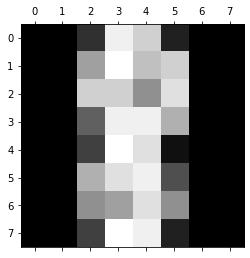

In [25]:
# Show one data

#plt.gray() 
plt.matshow(X_representative_digits_01_re[0,:],cmap='gray',vmin=0, vmax=16) 
plt.show()


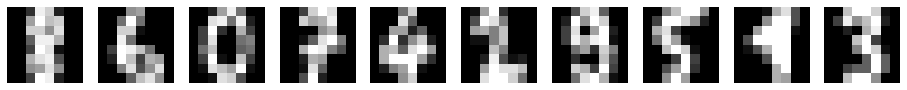

In [26]:
# Show several data for each label (== category) 
n_clusters=10

n_digits = np.unique(Y)
M = n_clusters # nombre des clusters
fig, axs = plt.subplots(1, M, figsize=(16, 16))

for i in range(M):
    axs[i].imshow(X_representative_digits_01_re[i,:],cmap='gray',vmin=0, vmax=16)
    axs[i].axis('off')

In [27]:
from sklearn.preprocessing import StandardScaler

scaler02 = StandardScaler()
X_scaled = scaler02.fit_transform(X)

kmeans02 = KMeans(init="random",
                n_clusters=10,
                n_init=10,
                max_iter=300,
               random_state=42
 )
kmeans02.fit(X_scaled)

KMeans(init='random', n_clusters=10, random_state=42)

In [28]:
print(kmeans02.inertia_)

69671.80496339034


In [29]:
print(kmeans02.labels_[:9])
print(Y[:9])

[7 8 8 6 4 6 2 0 6]
[0 1 2 3 4 5 6 7 8]


In [30]:
from sklearn.metrics import adjusted_rand_score
ari_kmeans02 = adjusted_rand_score(Y, kmeans02.labels_)
print(ari_kmeans02)

0.5712475639827101


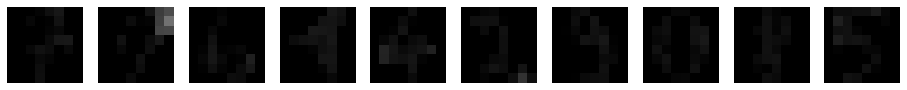

In [31]:
# Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
# Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
X_digits_dist_02 = kmeans02.fit_transform(X_scaled)
representative_digit_idx_02 = np.argmin(X_digits_dist_02, axis=0)
X_representative_digits_02 = X_scaled[representative_digit_idx_02]
X_representative_digits_02_re=X_representative_digits_02.reshape(10,8,8)# on fait reshape pour pouvoir la visualiser 

# Show several data for each label (== category) 


M = 10 # nombre des clusters
fig, axs = plt.subplots(1, M, figsize=(16, 16))

for i in range(M):
    axs[i].imshow(X_representative_digits_02_re[i,:],cmap='gray',vmin=0, vmax=16)
    axs[i].axis('off')


In [32]:
# Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
# Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
X_digits_dist_02 = kmeans02.fit_transform(X_scaled)



In [33]:
X_digits_dist_02.shape

(1797, 10)

In [34]:
representative_digit_idx_02 = np.argmin(X_digits_dist_02, axis=0)
representative_digit_idx_02.shape

(10,)

In [71]:
representative_digit_idx_02

array([1735,  742,  636,  487, 1190, 1617, 1173,  822, 1249, 1714,  717,
        439, 1110, 1063, 1135,  339, 1489,  390,  440,  851,   78,  968,
         17, 1112, 1589,  154,  217,  718, 1137, 1400])

In [35]:
X_representative_digits_02 = X_scaled[representative_digit_idx_02]
X_representative_digits_02.shape

(10, 64)

In [36]:
# on doit faire une transformation pour pouvoir les images originalles correspondantes
X_representative_digits_02_org = scaler02.inverse_transform((X_representative_digits_02))

X_representative_digits_02_org.shape


(10, 64)

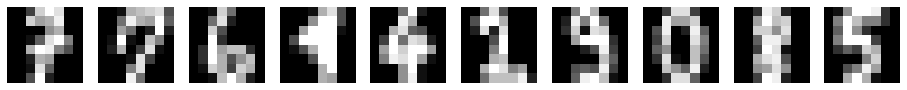

In [37]:
X_representative_digits_02_org_re=X_representative_digits_02_org.reshape(10,8,8)# on fait reshape pour pouvoir la visualiser 

# Show several data for each label (== category) 


M = n_clusters # nombre des clusters
fig, axs = plt.subplots(1, M, figsize=(16, 16))

for i in range(M):
    axs[i].imshow(X_representative_digits_02_org_re[i,:],cmap='gray',vmin=0, vmax=16)
    axs[i].axis('off')


In [38]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [39]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [70]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n=3
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n*n_digits, n_init=n*4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n*n_digits, n_init=n*4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n*n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n*n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.907s	44425	0.842	0.631	0.721	0.549	0.713	0.115
random   	0.494s	46466	0.845	0.629	0.721	0.558	0.713	0.124
PCA-based	0.044s	47997	0.820	0.604	0.696	0.525	0.688	0.131
__________________________________________________________________________________


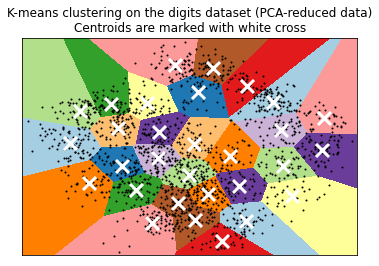

In [52]:
import matplotlib.pyplot as plt
Pca=PCA(n_components=2)
reduced_data = Pca.fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n*n_digits, n_init=2*4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [51]:
centroids.shape

(30, 2)

In [54]:
# on doit faire une transformation pour pouvoir les images originalles correspondantes
centroids_org = Pca.inverse_transform((centroids))

centroids_org.shape

(30, 64)

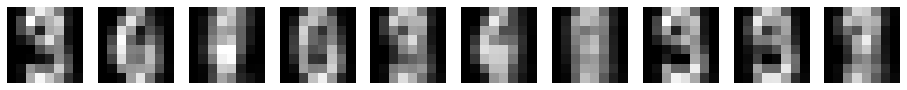

In [59]:
centroids_org_re=centroids_org.reshape(30,8,8)# on fait reshape pour pouvoir la visualiser 

# Show several data for each label (== category) 


M = n_digits # nombre des clusters
fig, axs = plt.subplots(1, M, figsize=(16, 16))

for i in range(M):
    axs[i].imshow(centroids_org_re[i,:],cmap='gray',vmin=0, vmax=16)
    axs[i].axis('off')

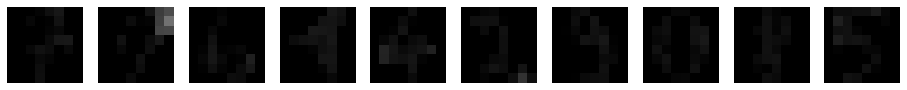

In [64]:
## Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
## Pour chaque cluster on essaie de trouver l'image  la plus proche de centroid
#X_digits_dist_02 = kmeans.fit_transform(reduced_data)
#representative_digit_idx_02 = np.argmin(X_digits_dist_02, axis=0)
#X_representative_digits_02 = reduced_data[representative_digit_idx_02]
#X_representative_digits_02_org = Pca.inverse_transform((X_representative_digits_02))
#X_representative_digits_02_org_re=X_representative_digits_02_org.reshape(30,8,8)# on fait reshape pour pouvoir la visualiser 

##Show several data for each label (== category) 


#M = 10 # nombre des clusters
#fig, axs = plt.subplots(1, M, figsize=(16, 16))

#for i in range(M):
   # axs[i].imshow(X_representative_digits_02_re[i,:],cmap='gray',vmin=0, vmax=16)
   # axs[i].axis('off')